In [1]:
#importing librarys
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns


In [2]:
df=pd.read_csv('tested.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
df=df.drop('Embarked',axis=1)

In [8]:
df=df.drop('Cabin',axis=1)

In [12]:
df.shape

(418, 10)

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
corr=df.corr(numeric_only=True)

<Axes: >

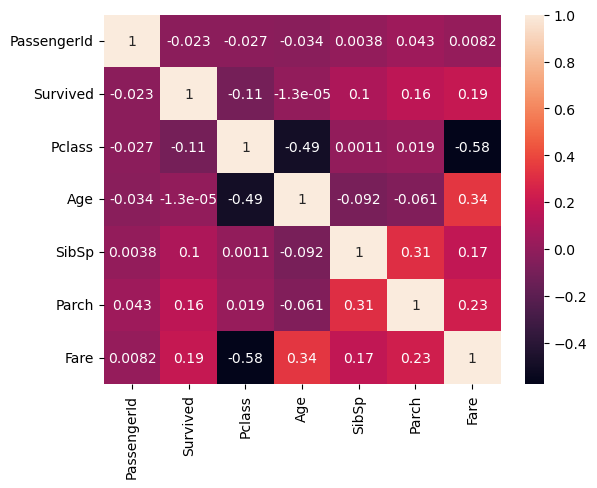

In [17]:
sns.heatmap(corr,annot=True)

<Axes: xlabel='Age', ylabel='Count'>

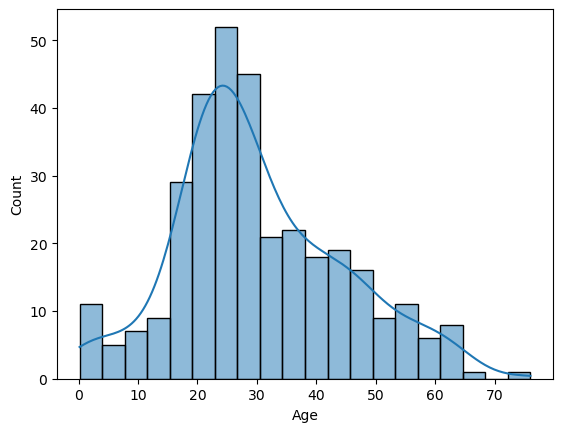

In [22]:
sns.histplot(df['Age'],bins=20,kde=True)

In [24]:
index=df['Sex'].value_counts().index
values=df['Sex'].value_counts().values

    plt.pie(values,labels=index,autopct='%')

([<matplotlib.patches.Wedge at 0x1abf650cf50>,
 [Text(-0.45695648023571717, 1.000595210447554, 'male'),
  Text(0.4569564802357173, -1.000595210447554, 'female')],
 [Text(-0.24924898921948208, 0.5457792056986657, '63.6%'),
  Text(0.24924898921948213, -0.5457792056986657, '36.4%')])

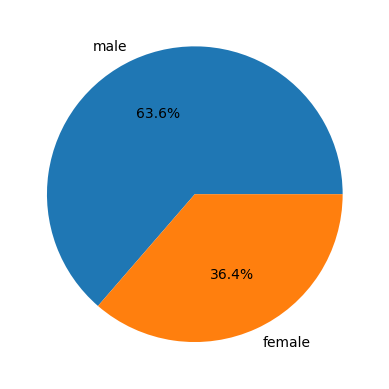

In [26]:
plt.pie(values,labels=index,autopct='%1.01f%%')    

In [35]:
df.groupby('Sex')['Survived'].size()

Sex
female    152
male      266
Name: Survived, dtype: int64

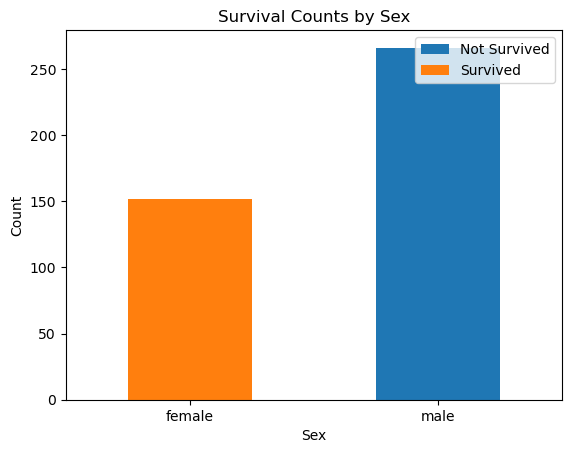

In [36]:
survived_counts = df.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)

# Plotting
survived_counts.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Survival Counts by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels
plt.legend(['Not Survived', 'Survived'], loc='upper right')
plt.show()

<Axes: xlabel='Survived'>

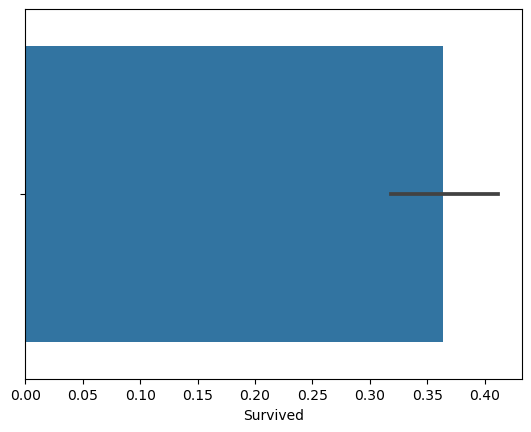

In [39]:
sns.barplot(x='Survived',hue='Sex',data=df)

In [56]:
df.groupby(['Pclass','Survived'])['Survived'].size()

Pclass  Survived
1       0            57
        1            50
2       0            63
        1            30
3       0           146
        1            72
Name: Survived, dtype: int64

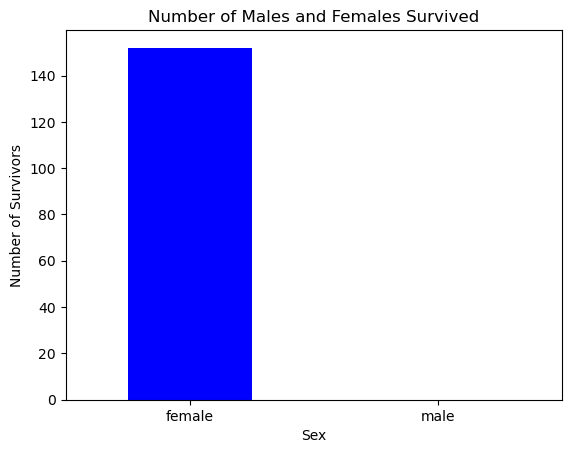

In [57]:
# Group by 'Sex' and calculate the sum of 'Survived' (since 1 represents survived)
survived_by_sex = df.groupby('Sex')['Survived'].sum()

# Plotting
survived_by_sex.plot(kind='bar', color=['blue', 'pink'])
plt.title('Number of Males and Females Survived')
plt.xlabel('Sex')
plt.ylabel('Number of Survivors')
plt.xticks(rotation=0)  # Rotate x-axis labels
plt.show()

In [59]:
df.groupby(['Sex','Survived']).size().unstack(fill_value=0)

Survived,0,1
Sex,,
female,0,152
male,266,0


In [60]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875
...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500


In [69]:
df[(df['Survived']==1) & (df['Sex']=='male')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
...,...,...,...,...,...,...,...,...,...,...,...,...
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S


In [67]:
df=pd.read_csv('titanic.csv')

In [68]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [75]:
a=df.groupby(['Survived','Sex']).size().unstack(fill_value=0)

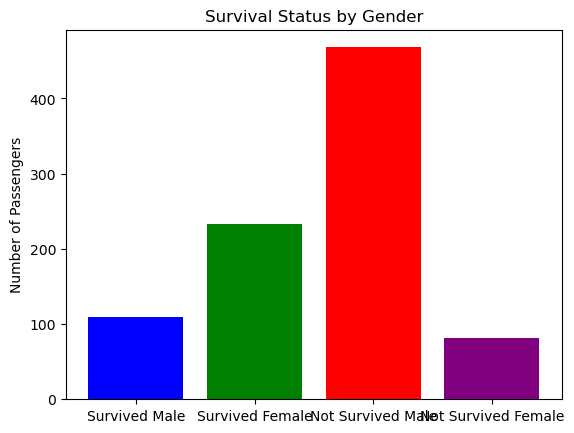

In [84]:
survived_sex = df.groupby(['Survived', 'Sex']).size().unstack()

# Extracting data for plotting
survived_male = survived_sex.loc[1, 'male']
survived_female = survived_sex.loc[1, 'female']
not_survived_male = survived_sex.loc[0, 'male']
not_survived_female = survived_sex.loc[0, 'female']

# Plotting the bar plot
plt.bar(['Survived Male', 'Survived Female', 'Not Survived Male', 'Not Survived Female'],
        [survived_male, survived_female, not_survived_male, not_survived_female],
        color=['blue', 'green', 'red', 'purple'])

# Adding labels and title
plt.title('Survival Status by Gender')
plt.ylabel('Number of Passengers')

# Show the plot
plt.show()

In [102]:
a=df.groupby(['Sex','Survived']).size()

In [103]:
a

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, '(female, 0)'),
  Text(1, 0, '(female, 1)'),
  Text(2, 0, '(male, 0)'),
  Text(3, 0, '(male, 1)')])

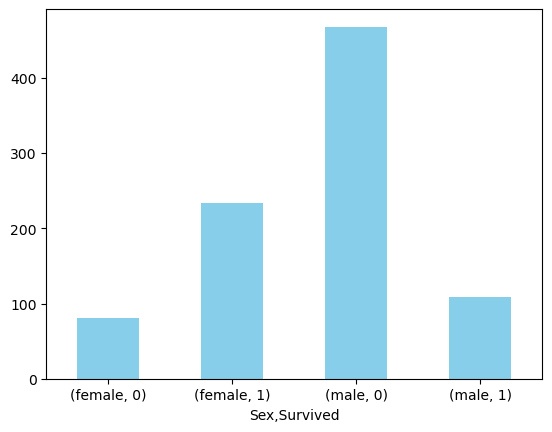

In [104]:
a.plot(kind='bar',color='skyblue')
plt.xticks(rotation=0)

In [105]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [130]:
df['Title']=df['Name'].str.split(',').str[1].str.split('.').str[0]

In [131]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [132]:
df[df['']]

Title
 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 the Countess      1
 Capt              1
 Ms                1
 Sir               1
 Lady              1
 Mme               1
 Don               1
 Jonkheer          1
Name: count, dtype: int64

In [142]:
index=df['Title'].value_counts().head(4).index
values=df['Title'].value_counts().head(4).values

([<matplotlib.patches.Wedge at 0x1ab816d3110>,
 [Text(-0.3345887202366617, 1.047878995061163, ' Mr'),
  Text(-0.3154836692617051, -1.0537884296333735, ' Miss'),
  Text(0.808297469446999, -0.7460932923472626, ' Mrs'),
  Text(1.0883857845411131, -0.15942516742605625, ' Master')],
 [Text(-0.18250293831090636, 0.5715703609424526, '59.8%'),
  Text(-0.1720820014154755, -0.5747936888909309, '21.1%'),
  Text(0.4408895287892722, -0.40695997764396136, '14.5%'),
  Text(0.5936649733860616, -0.08695918223239431, '4.6%')])

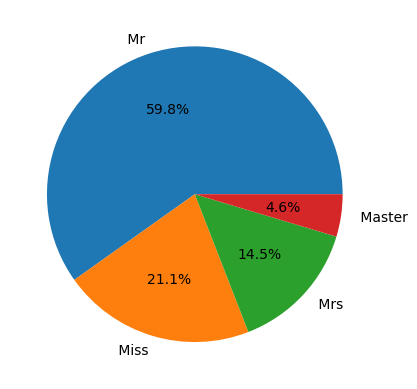

In [143]:
plt.pie(values,labels=index,autopct='%1.01f%%')

In [ ]:
corrdf.corr()